In [151]:
import json
from pathlib import Path
from typing import Any

import joblib
import pandas as pd
import torch


In [4]:
def load_metrics(file_path: str) -> dict[str, Any]:
    with Path(file_path).open("r") as f:
        return json.load(f)

In [7]:
all_ml_metrics: dict[str, dict[str, Any]] = {
    "LBP": load_metrics("outputs/models/LBP/metrics.json"),
    "HOG": load_metrics("outputs/models/HOG/metrics.json"),
    "Gabor": load_metrics("outputs/models/Gabor/metrics.json"),
    "Color": load_metrics("outputs/models/Color/metrics.json"),
    "All": load_metrics("outputs/models/All/metrics.json"),
    "All_noLBP": load_metrics("outputs/models/All_noLBP/metrics.json"),
    "All_noHOG": load_metrics("outputs/models/All_noHOG/metrics.json"),
    "All_noGabor": load_metrics("outputs/models/All_noGabor/metrics.json"),
    "All_noColor": load_metrics("outputs/models/All_noColor/metrics.json"),
    "Gabor+Color": load_metrics("outputs/models/Gabor+Color/metrics.json"),
}

In [20]:
all_cnn_model_and_metrics: dict[str, dict[str, Any]] = {
    "CNN_original": joblib.load("outputs/models_deep/train_result.joblib"),
    "CNN_new": joblib.load("outputs/models_deep/train_result2.joblib"),
}

In [21]:
all_cnn_model_and_metrics["CNN_original"]["best_model"]["accuracy"]

0.938

In [22]:
all_cnn_model_and_metrics["CNN_new"]["best_model"]["accuracy"]

0.96025

In [23]:
all_ml_metrics

{'LBP': {'GaussianNB': {'training_time': 0.010178089141845703,
   'prediction_time': 0.0038552284240722656,
   'report': {'Real': {'precision': 0.6130970724191063,
     'recall': 0.7958,
     'f1-score': 0.6926022628372498,
     'support': 10000.0},
    'Fake': {'precision': 0.7091168091168091,
     'recall': 0.4978,
     'f1-score': 0.5849588719153936,
     'support': 10000.0},
    'accuracy': 0.6468,
    'macro avg': {'precision': 0.6611069407679577,
     'recall': 0.6468,
     'f1-score': 0.6387805673763217,
     'support': 20000.0},
    'weighted avg': {'precision': 0.6611069407679577,
     'recall': 0.6468,
     'f1-score': 0.6387805673763218,
     'support': 20000.0}},
   'report_str': '              precision    recall  f1-score   support\n\n        Real     0.6131    0.7958    0.6926     10000\n        Fake     0.7091    0.4978    0.5850     10000\n\n    accuracy                         0.6468     20000\n   macro avg     0.6611    0.6468    0.6388     20000\nweighted avg     0.

In [26]:
all_ml_metrics["LBP"].keys()

dict_keys(['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'LGBMClassifier'])

In [37]:
all_ml_metrics["All"]["GaussianNB"]

{'training_time': 0.31090807914733887,
 'prediction_time': 0.12645435333251953,
 'report': {'Real': {'precision': 0.8159734565706838,
   'recall': 0.6886,
   'f1-score': 0.7468951678507512,
   'support': 10000.0},
  'Fake': {'precision': 0.7306461378773462,
   'recall': 0.8447,
   'f1-score': 0.7835443625063773,
   'support': 10000.0},
  'accuracy': 0.76665,
  'macro avg': {'precision': 0.773309797224015,
   'recall': 0.76665,
   'f1-score': 0.7652197651785642,
   'support': 20000.0},
  'weighted avg': {'precision': 0.7733097972240149,
   'recall': 0.76665,
   'f1-score': 0.7652197651785642,
   'support': 20000.0}},
 'report_str': '              precision    recall  f1-score   support\n\n        Real     0.8160    0.6886    0.7469     10000\n        Fake     0.7306    0.8447    0.7835     10000\n\n    accuracy                         0.7667     20000\n   macro avg     0.7733    0.7667    0.7652     20000\nweighted avg     0.7733    0.7667    0.7652     20000\n',
 'model_size_mb': 0.009

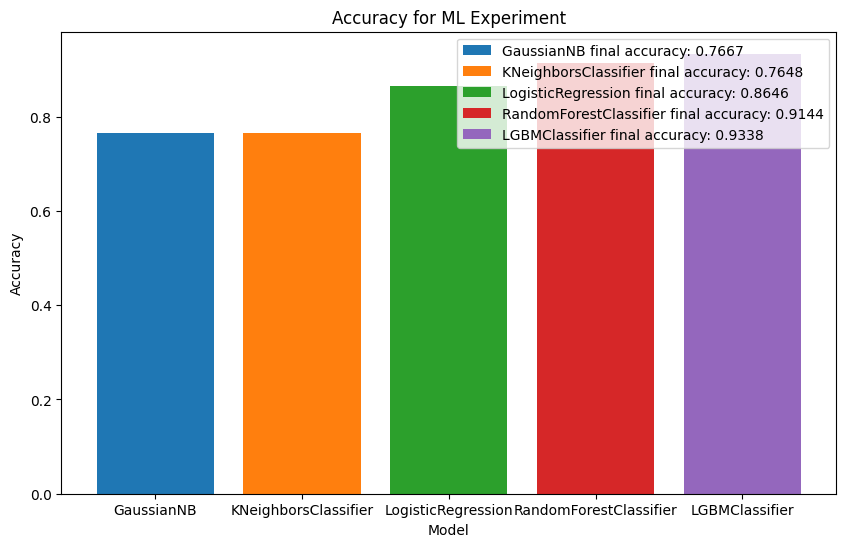

In [43]:
from matplotlib import pyplot as plt


def plot_accuracy_of_one_ml_experiment(experiment_result: dict) -> None:
    plt.figure(figsize=(10, 6))
    for model_name, metrics in experiment_result.items():
        accuracy = metrics["report"]["accuracy"]
        plt.bar(model_name, accuracy, label=f"{model_name} final accuracy: {accuracy:.4f}")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.title("Accuracy for ML Experiment")
    plt.legend()
    plt.show()


plot_accuracy_of_one_ml_experiment(all_ml_metrics["All"])

In [82]:
def plot_grouped_bar_accuracy_of_all_ml_experiments(all_experiments: dict[str, dict[str, Any]], title: str) -> None:
    plt.figure(figsize=(10, 8))
    feature_groups = list(all_experiments.keys())
    model_names = list(next(iter(all_experiments.values())).keys())
    bar_width = 0.1
    x = range(len(feature_groups))

    for i, model_name in enumerate(model_names):
        accuracies = [all_experiments[fg][model_name]["report"]["accuracy"] for fg in feature_groups]
        plt.bar([pos + i * bar_width for pos in x], accuracies, width=bar_width, label=model_name)

    max_accuracy = max(
        [all_experiments[fg][model_name]["report"]["accuracy"] for fg in feature_groups for model_name in model_names],
    )
    plt.axhline(y=max_accuracy, color="r", linestyle="--", label=f"Max Accuracy: {max_accuracy:.4f}")

    plt.xlabel("Feature Group")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.xticks([pos + bar_width * (len(model_names) / 2 - 0.5) for pos in x], feature_groups, rotation=45)
    plt.ylim(0.5, 1.0)
    # smaller legend to avoid overlap
    plt.legend(loc="lower right", fontsize="small")
    plt.tight_layout()
    plt.show()


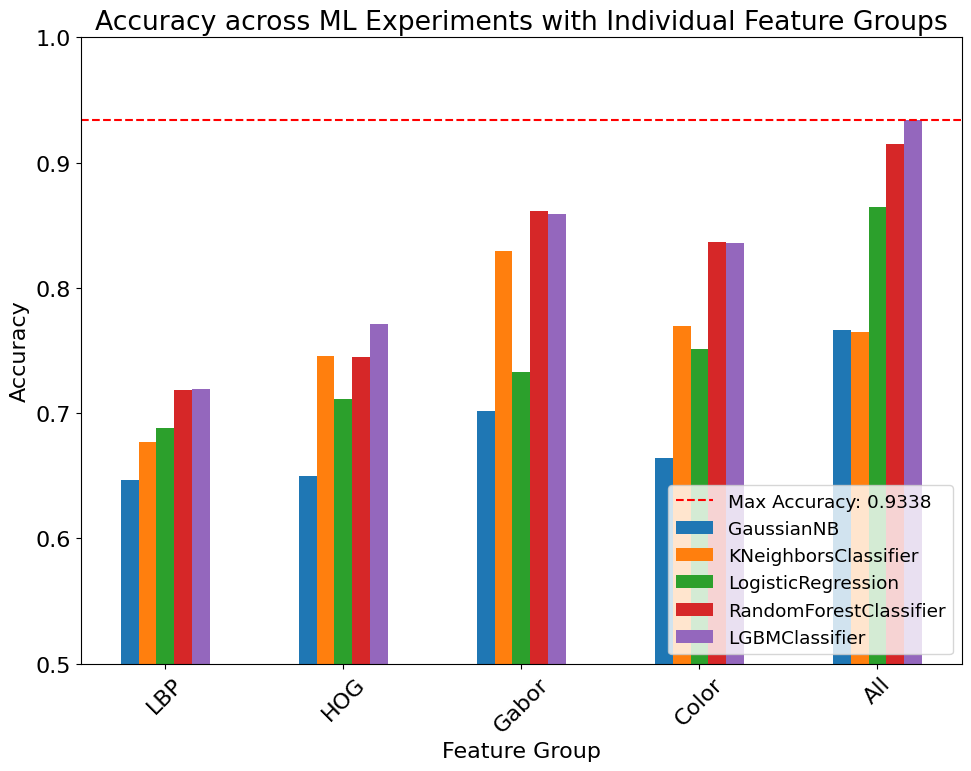

In [84]:
first_groups = [
    "LBP",
    "HOG",
    "Gabor",
    "Color",
    "All",
    # "All_noLBP",
    # "All_noHOG",
    # "All_noGabor",
    # "All_noColor",
    # "Gabor+Color",
]
plot_grouped_bar_accuracy_of_all_ml_experiments(
    {fg: all_ml_metrics[fg] for fg in first_groups},
    "Accuracy across ML Experiments with Individual Feature Groups",
)

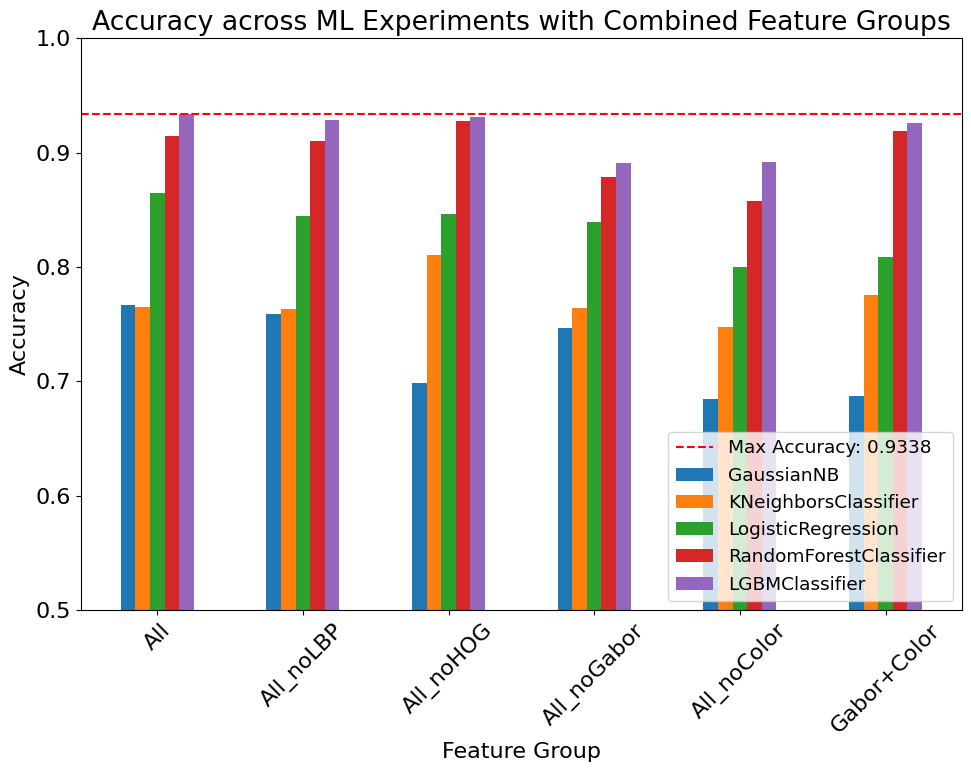

In [85]:
second_groups = [
    # "LBP",
    # "HOG",
    # "Gabor",
    # "Color",
    "All",
    "All_noLBP",
    "All_noHOG",
    "All_noGabor",
    "All_noColor",
    "Gabor+Color",
]
plot_grouped_bar_accuracy_of_all_ml_experiments(
    {sg: all_ml_metrics[sg] for sg in second_groups},
    "Accuracy across ML Experiments with Combined Feature Groups",
)

In [ ]:
all_ml_metrics["All"].keys()

dict_keys(['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'LGBMClassifier'])

In [80]:
all_ml_metrics["All"]["GaussianNB"]

{'training_time': 0.31090807914733887,
 'prediction_time': 0.12645435333251953,
 'report': {'Real': {'precision': 0.8159734565706838,
   'recall': 0.6886,
   'f1-score': 0.7468951678507512,
   'support': 10000.0},
  'Fake': {'precision': 0.7306461378773462,
   'recall': 0.8447,
   'f1-score': 0.7835443625063773,
   'support': 10000.0},
  'accuracy': 0.76665,
  'macro avg': {'precision': 0.773309797224015,
   'recall': 0.76665,
   'f1-score': 0.7652197651785642,
   'support': 20000.0},
  'weighted avg': {'precision': 0.7733097972240149,
   'recall': 0.76665,
   'f1-score': 0.7652197651785642,
   'support': 20000.0}},
 'report_str': '              precision    recall  f1-score   support\n\n        Real     0.8160    0.6886    0.7469     10000\n        Fake     0.7306    0.8447    0.7835     10000\n\n    accuracy                         0.7667     20000\n   macro avg     0.7733    0.7667    0.7652     20000\nweighted avg     0.7733    0.7667    0.7652     20000\n',
 'model_size_mb': 0.009

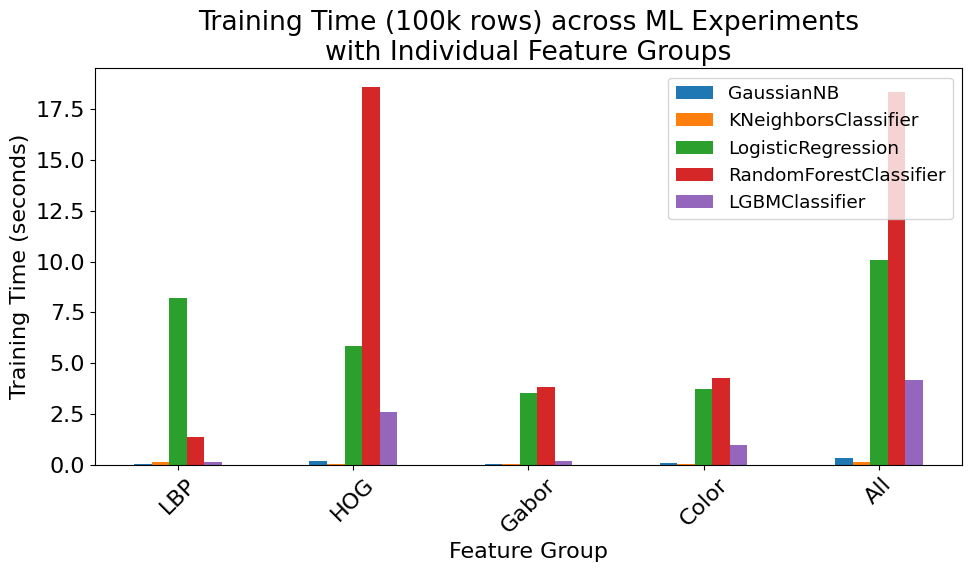

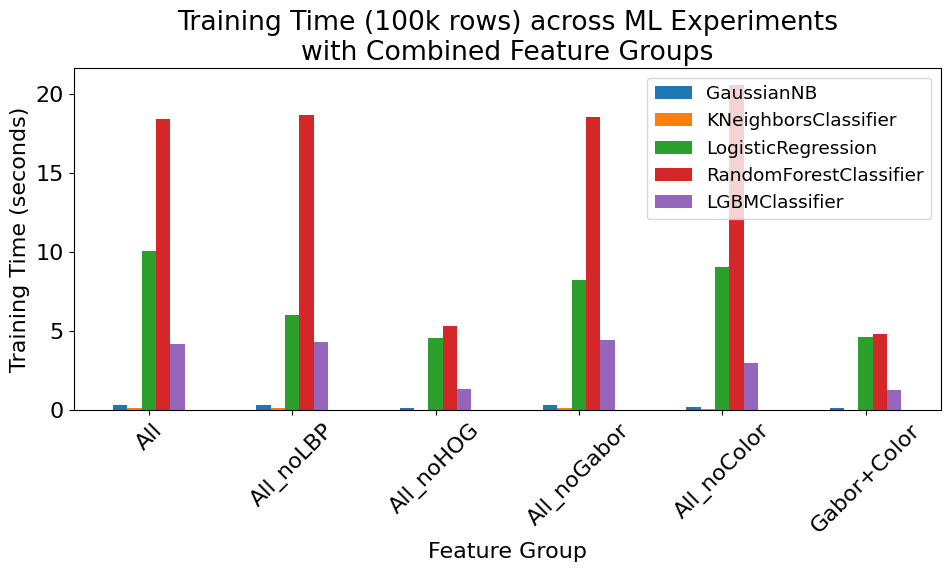

In [95]:
def plot_time_metrics_of_all_ml_experiments(
    all_experiments: dict[str, dict[str, Any]],
    metric: str = "training_time",
    title: str | None = None,
) -> None:
    plt.figure(figsize=(10, 6))
    feature_groups = list(all_experiments.keys())
    model_names = list(next(iter(all_experiments.values())).keys())
    bar_width = 0.1
    x = range(len(feature_groups))

    for i, model_name in enumerate(model_names):
        times = [all_experiments[fg][model_name][metric] for fg in feature_groups]
        plt.bar([pos + i * bar_width for pos in x], times, width=bar_width, label=model_name)

    plt.xlabel("Feature Group")
    plt.ylabel(f"{metric.replace('_', ' ').title()} (seconds)")
    plt.title(title if title is not None else f"{metric.replace('_', ' ').title()} across ML Experiments")
    plt.xticks([pos + bar_width * (len(model_names) / 2 - 0.5) for pos in x], feature_groups, rotation=45)
    plt.legend(loc="upper right", fontsize="small")
    plt.tight_layout()
    plt.show()


plot_time_metrics_of_all_ml_experiments(
    {fg: all_ml_metrics[fg] for fg in first_groups},
    metric="training_time",
    title="Training Time (100k rows) across ML Experiments\nwith Individual Feature Groups",
)
plot_time_metrics_of_all_ml_experiments(
    {sg: all_ml_metrics[sg] for sg in second_groups},
    metric="training_time",
    title="Training Time (100k rows) across ML Experiments\nwith Combined Feature Groups",
)

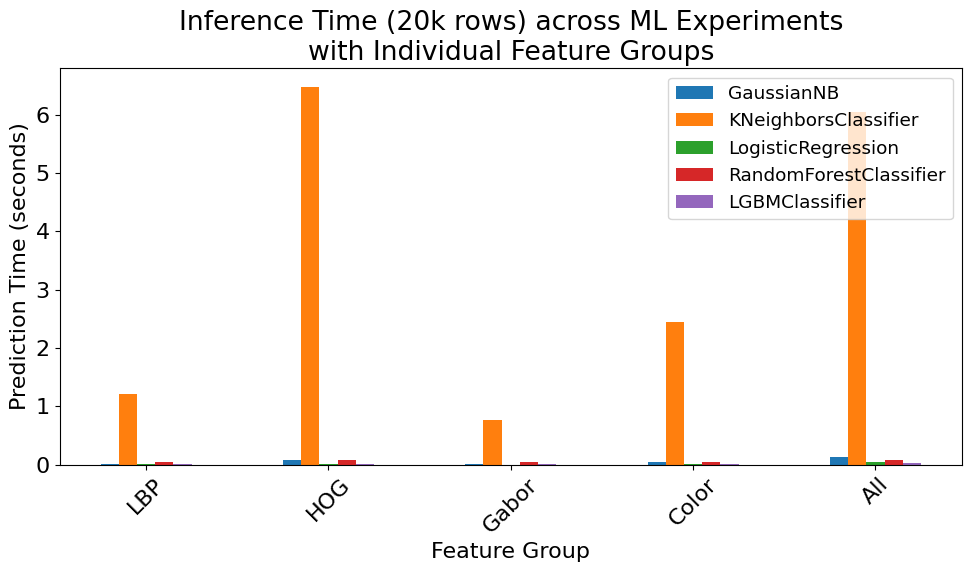

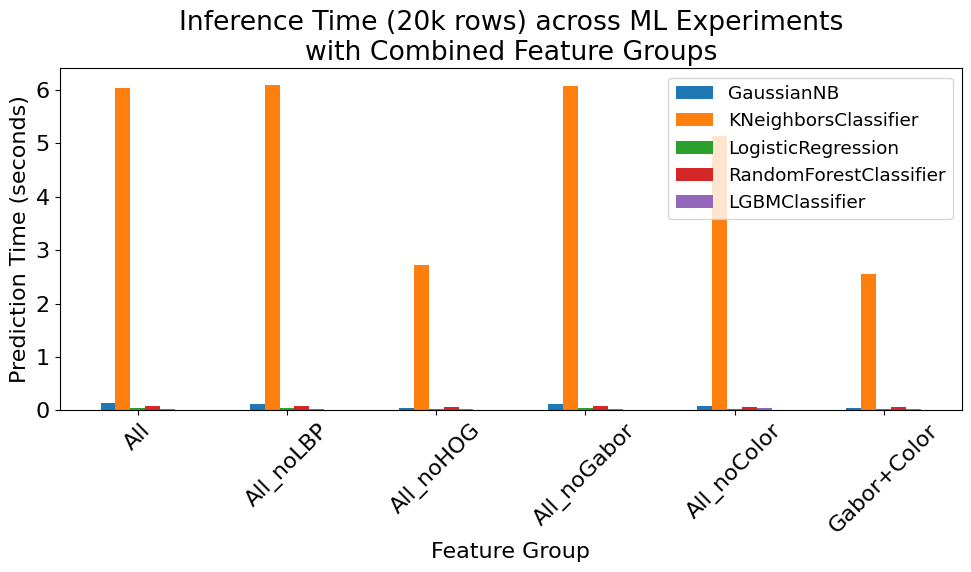

In [97]:
plot_time_metrics_of_all_ml_experiments(
    {fg: all_ml_metrics[fg] for fg in first_groups},
    metric="prediction_time",
    title="Inference Time (20k rows) across ML Experiments\nwith Individual Feature Groups",
)
plot_time_metrics_of_all_ml_experiments(
    {sg: all_ml_metrics[sg] for sg in second_groups},
    metric="prediction_time",
    title="Inference Time (20k rows) across ML Experiments\nwith Combined Feature Groups",
)

# The best model from ML is LGBM with all features

In [106]:
all_cnn_model_and_metrics["CNN_original"]["val_report_history"]

[{'0.0': {'precision': 0.7369811320754717,
   'recall': 0.9765,
   'f1-score': 0.84,
   'support': 10000.0},
  '1.0': {'precision': 0.9651851851851851,
   'recall': 0.6515,
   'f1-score': 0.777910447761194,
   'support': 10000.0},
  'accuracy': 0.814,
  'macro avg': {'precision': 0.8510831586303285,
   'recall': 0.8140000000000001,
   'f1-score': 0.808955223880597,
   'support': 20000.0},
  'weighted avg': {'precision': 0.8510831586303284,
   'recall': 0.814,
   'f1-score': 0.808955223880597,
   'support': 20000.0}},
 {'0.0': {'precision': 0.9183462532299742,
   'recall': 0.8885,
   'f1-score': 0.9031766200762389,
   'support': 10000.0},
  '1.0': {'precision': 0.8920096852300242,
   'recall': 0.921,
   'f1-score': 0.9062730627306274,
   'support': 10000.0},
  'accuracy': 0.90475,
  'macro avg': {'precision': 0.9051779692299993,
   'recall': 0.9047499999999999,
   'f1-score': 0.9047248414034331,
   'support': 20000.0},
  'weighted avg': {'precision': 0.9051779692299992,
   'recall': 0.9

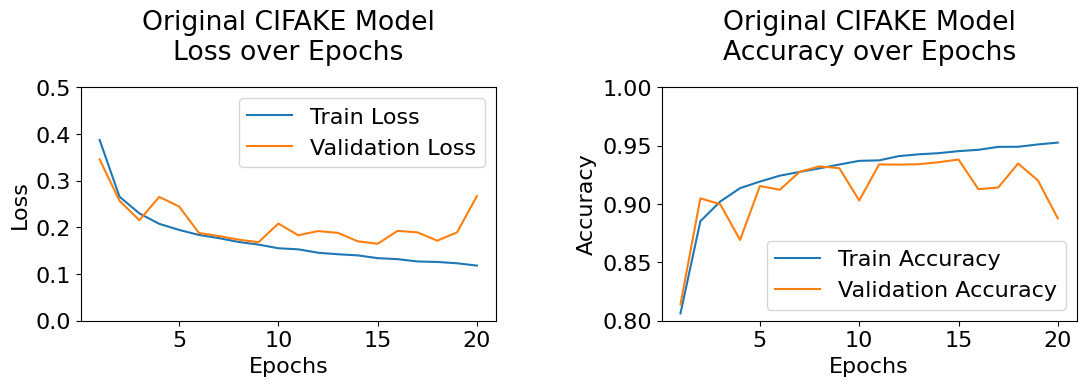

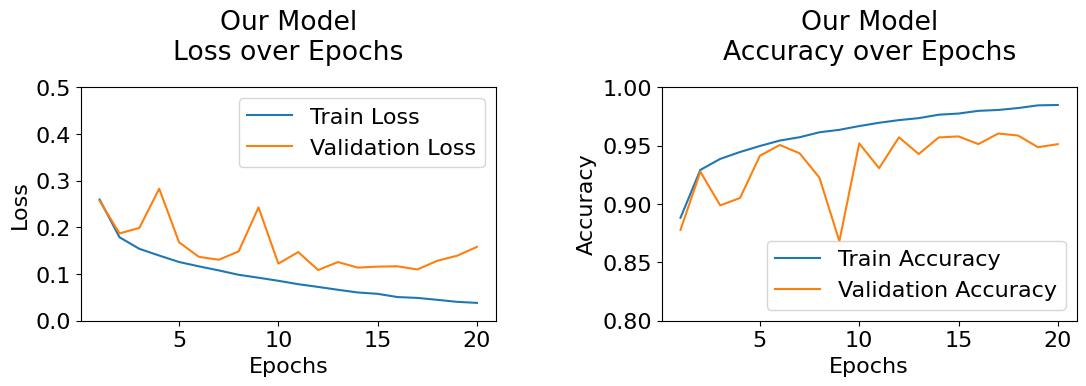

In [115]:
def plot_training_history(train_result: dict[str, list[float]], title: str) -> None:
    epochs = range(1, len(train_result["train_loss_history"]) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_result["train_loss_history"], label="Train Loss")
    plt.plot(epochs, train_result["val_loss_history"], label="Validation Loss")
    plt.title(f"{title}\nLoss over Epochs", pad=20)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.ylim(0, 0.5)
    plt.legend()

    # Plot Accuracy
    train_accuracies = [report["accuracy"] for report in train_result["train_report_history"]]
    val_accuracies = [report["accuracy"] for report in train_result["val_report_history"]]

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Validation Accuracy")
    plt.title(f"{title}\nAccuracy over Epochs", pad=20)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0.8, 1.0)
    plt.legend(loc="lower right")
    plt.tight_layout(pad=3.0)
    plt.show()


plot_training_history(all_cnn_model_and_metrics["CNN_original"], "Original CIFAKE Model")
plot_training_history(all_cnn_model_and_metrics["CNN_new"], "Our Model")

In [205]:
def get_best_metrics_across_epochs(train_result: dict[str, list[float]]) -> dict[str, Any]:
    val_accuracies = [report["accuracy"] for report in train_result["val_report_history"]]
    best_epoch = val_accuracies.index(max(val_accuracies))
    return {
        "epoch": best_epoch + 1,
        "accuracy": val_accuracies[best_epoch],
        "loss": train_result["val_loss_history"][best_epoch],
        "report": train_result["val_report_history"][best_epoch],
    }


In [206]:
get_best_metrics_across_epochs(all_cnn_model_and_metrics["CNN_original"])


{'epoch': 15,
 'accuracy': 0.938,
 'loss': 0.16467309698082838,
 'report': {'0.0': {'precision': 0.9415322580645161,
   'recall': 0.934,
   'f1-score': 0.9377510040160643,
   'support': 10000.0},
  '1.0': {'precision': 0.9345238095238095,
   'recall': 0.942,
   'f1-score': 0.9382470119521913,
   'support': 10000.0},
  'accuracy': 0.938,
  'macro avg': {'precision': 0.9380280337941629,
   'recall': 0.938,
   'f1-score': 0.9379990079841278,
   'support': 20000.0},
  'weighted avg': {'precision': 0.9380280337941629,
   'recall': 0.938,
   'f1-score': 0.9379990079841278,
   'support': 20000.0}}}

In [207]:
get_best_metrics_across_epochs(all_cnn_model_and_metrics["CNN_new"])

{'epoch': 17,
 'accuracy': 0.96025,
 'loss': 0.1096508169819595,
 'report': {'0.0': {'precision': 0.9477575639653663,
   'recall': 0.9742,
   'f1-score': 0.9607968834755165,
   'support': 10000.0},
  '1.0': {'precision': 0.97345952062545,
   'recall': 0.9463,
   'f1-score': 0.9596876426144719,
   'support': 10000.0},
  'accuracy': 0.96025,
  'macro avg': {'precision': 0.9606085422954082,
   'recall': 0.96025,
   'f1-score': 0.9602422630449943,
   'support': 20000.0},
  'weighted avg': {'precision': 0.9606085422954082,
   'recall': 0.96025,
   'f1-score': 0.9602422630449943,
   'support': 20000.0}}}

In [ ]:
all_cnn_model_and_metrics["CNN_new"]["best_model"]["state_dict"]

In [154]:
# Save state_dict in joblib with compress=3
joblib_path = "outputs/models_deep/cnn_original_state_dict.joblib"
joblib.dump(all_cnn_model_and_metrics["CNN_original"]["best_model"]["state_dict"], joblib_path, compress=3)

# Save state_dict in torch format
torch_path = "outputs/models_deep/cnn_original_state_dict.pt"
torch.save(all_cnn_model_and_metrics["CNN_original"]["best_model"]["state_dict"], torch_path)
# Check file sizes in MB
cnn_original_joblib_size_mb = Path(joblib_path).stat().st_size / (1024 * 1024)
cnn_original_torch_size_mb = Path(torch_path).stat().st_size / (1024 * 1024)

print(f"Joblib file size: {cnn_original_joblib_size_mb:.3f} MB")
print(f"Torch file size: {cnn_original_torch_size_mb:.3f} MB")

Joblib file size: 0.301 MB
Torch file size: 0.324 MB


In [155]:
# Save state_dict in joblib with compress=3
joblib_path = "outputs/models_deep/cnn_new_state_dict.joblib"
joblib.dump(all_cnn_model_and_metrics["CNN_new"]["best_model"]["state_dict"], joblib_path, compress=3)

# Save state_dict in torch format
torch_path = "outputs/models_deep/cnn_new_state_dict.pt"
torch.save(all_cnn_model_and_metrics["CNN_new"]["best_model"]["state_dict"], torch_path)

# Check file sizes in MB
cnn_new_joblib_size_mb = Path(joblib_path).stat().st_size / (1024 * 1024)
cnn_new_torch_size_mb = Path(torch_path).stat().st_size / (1024 * 1024)

print(f"Joblib file size: {cnn_new_joblib_size_mb:.3f} MB")
print(f"Torch file size: {cnn_new_torch_size_mb:.3f} MB")

Joblib file size: 1.300 MB
Torch file size: 1.400 MB


In [245]:
# I hand-copy this from the experiment files
lbp_extraction_time = 14  # seconds (for 100k images)
hog_extraction_time = 12  # seconds (for 100k images)
gabor_extraction_time = 186 + 64 + 181 + 63 + 37 + 17 + 45 + 27  # seconds (for 100k images)
color_extraction_time = 65 + 90  # seconds (for 100k images)
total_feature_extraction_time = (
    lbp_extraction_time + hog_extraction_time + gabor_extraction_time + color_extraction_time
)
total_feature_extraction_time

801

In [246]:
image_loading_time = 50  # seconds (for 100k images)
image_loading_time

50

In [247]:
import numpy as np

data_for_plot_best_model_accuracy = {}
for model_name, metric in all_ml_metrics["All"].items():
    data_for_plot_best_model_accuracy[model_name] = {
        "accuracy": metric["report"]["accuracy"],
        "precision": metric["report"]["macro avg"]["precision"],
        "recall": metric["report"]["macro avg"]["recall"],
        "f1-score": metric["report"]["macro avg"]["f1-score"],
        "feature_extraction_time": total_feature_extraction_time,
        "image_loading_time": image_loading_time,
        "training_time": metric["training_time"],
        "prediction_time": metric["prediction_time"],
        "model_size (MB)": metric["model_size_mb"],
    }

data_for_plot_best_model_accuracy["CNN_original"] = {
    "accuracy": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_original"],
    )["accuracy"],
    "precision": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_original"],
    )["report"]["macro avg"]["precision"],
    "recall": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_original"],
    )["report"]["macro avg"]["recall"],
    "f1-score": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_original"],
    )["report"]["macro avg"]["f1-score"],
    "training_time": np.sum(
        all_cnn_model_and_metrics["CNN_original"]["train_time_history"][:15],  # Sum up to the best epoch
    ),
    "prediction_time": all_cnn_model_and_metrics["CNN_original"]["val_time_history"][14],  # Only the best epoch
    "model_size (MB)": cnn_original_joblib_size_mb,
}
data_for_plot_best_model_accuracy["CNN_new"] = {
    "accuracy": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_new"],
    )["accuracy"],
    "precision": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_new"],
    )["report"]["macro avg"]["precision"],
    "recall": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_new"],
    )["report"]["macro avg"]["recall"],
    "f1-score": get_best_metrics_across_epochs(
        all_cnn_model_and_metrics["CNN_new"],
    )["report"]["macro avg"]["f1-score"],
    "training_time": np.sum(
        all_cnn_model_and_metrics["CNN_new"]["train_time_history"][:17],  # Sum up to the best epoch
    ),
    "prediction_time": all_cnn_model_and_metrics["CNN_new"]["val_time_history"][16],  # Only the best epoch
    "model_size (MB)": cnn_new_joblib_size_mb,
}
data_for_plot_best_model_accuracy

{'GaussianNB': {'accuracy': 0.76665,
  'precision': 0.773309797224015,
  'recall': 0.76665,
  'f1-score': 0.7652197651785642,
  'feature_extraction_time': 801,
  'image_loading_time': 50,
  'training_time': 0.31090807914733887,
  'prediction_time': 0.12645435333251953,
  'model_size (MB)': 0.009387016296386719},
 'KNeighborsClassifier': {'accuracy': 0.7648,
  'precision': 0.7650957301927739,
  'recall': 0.7647999999999999,
  'f1-score': 0.7647343867731271,
  'feature_extraction_time': 801,
  'image_loading_time': 50,
  'training_time': 0.11675906181335449,
  'prediction_time': 6.042317628860474,
  'model_size (MB)': 131.2676649093628},
 'LogisticRegression': {'accuracy': 0.8646,
  'precision': 0.8647963479863401,
  'recall': 0.8646,
  'f1-score': 0.8645817781240643,
  'feature_extraction_time': 801,
  'image_loading_time': 50,
  'training_time': 10.052619934082031,
  'prediction_time': 0.038442134857177734,
  'model_size (MB)': 0.005169868469238281},
 'RandomForestClassifier': {'accura

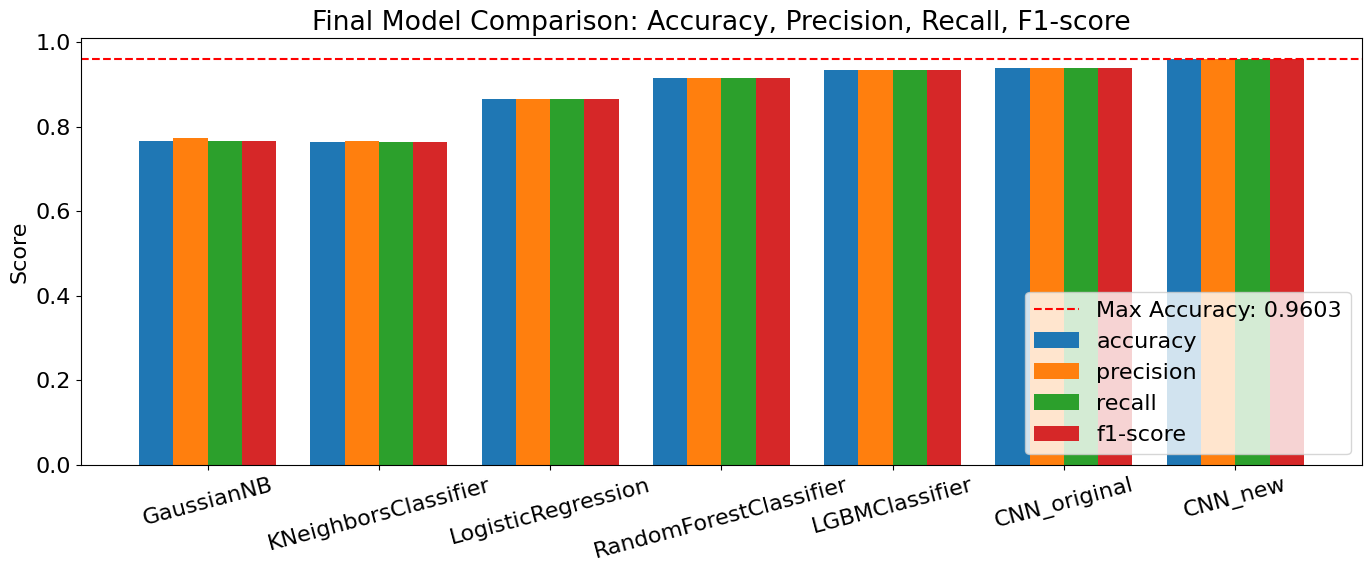

In [248]:
metrics = ["accuracy", "precision", "recall", "f1-score"]
models = list(data_for_plot_best_model_accuracy.keys())
x = np.arange(len(models))
bar_width = 0.2

max_acc = max([data_for_plot_best_model_accuracy[m]["accuracy"] for m in models])
plt.figure(figsize=(14, 6))
for i, metric in enumerate(metrics):
    values = [data_for_plot_best_model_accuracy[m][metric] for m in models]
    plt.bar(x + i * bar_width, values, width=bar_width, label=metric)

plt.axhline(y=max_acc, color="r", linestyle="--", label=f"Max Accuracy: {max_acc:.4f}")
plt.xticks(x + bar_width * 1.5, models, rotation=15)
plt.ylabel("Score")
plt.title("Final Model Comparison: Accuracy, Precision, Recall, F1-score")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


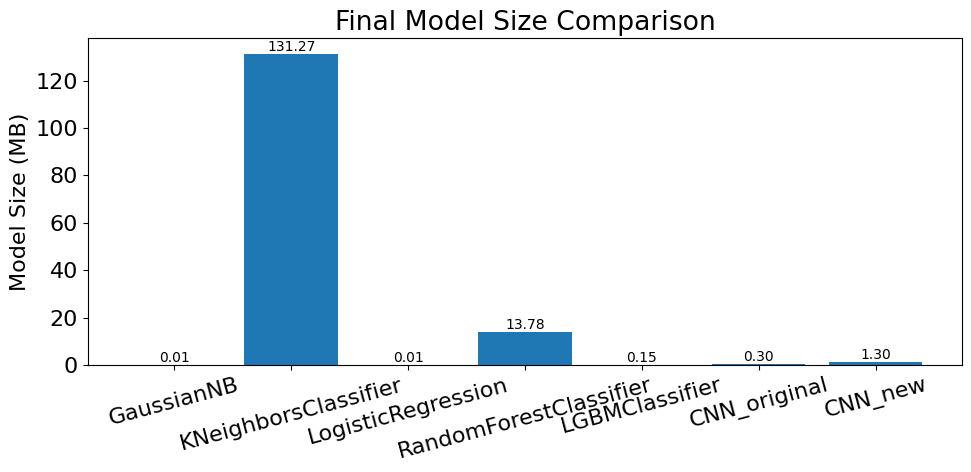

In [249]:
metric_to_plot = "model_size (MB)"
values = [data_for_plot_best_model_accuracy[m][metric_to_plot] for m in models]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, values)
plt.ylabel("Model Size (MB)")
plt.title("Final Model Size Comparison")
plt.xticks(rotation=15)
plt.tight_layout()

# Add numbers on top of each bar
for bar, value in zip(bars, values, strict=False):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.show()


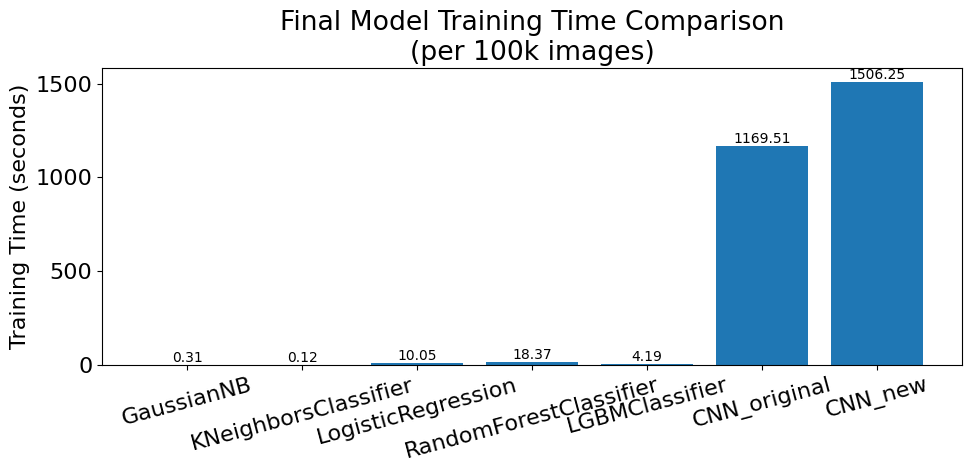

In [250]:
metric_to_plot = "training_time"
values = [data_for_plot_best_model_accuracy[m][metric_to_plot] for m in models]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, values)
plt.ylabel("Training Time (seconds)")
plt.title("Final Model Training Time Comparison\n(per 100k images)")
plt.xticks(rotation=15)
plt.tight_layout()

# Add numbers on top of each bar
for bar, value in zip(bars, values, strict=False):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.show()


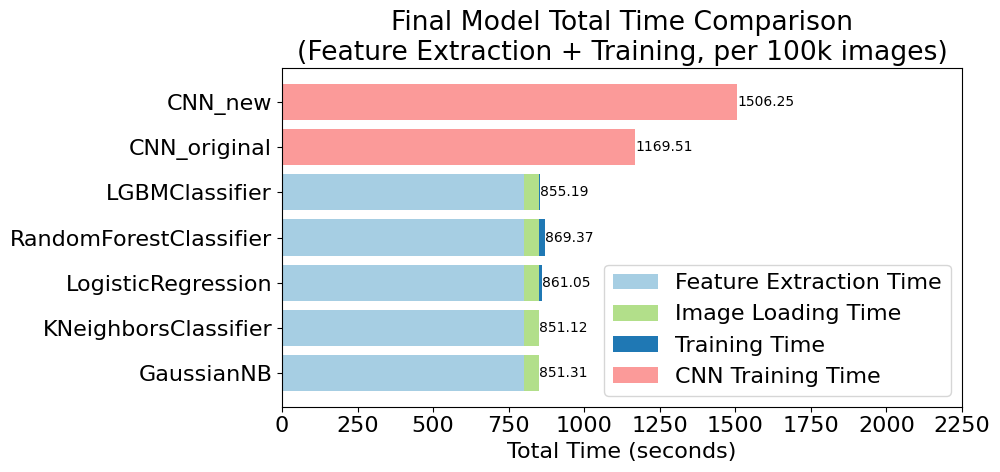

In [251]:
ml_models = ["GaussianNB", "KNeighborsClassifier", "LogisticRegression", "RandomForestClassifier", "LGBMClassifier"]
cnn_models = ["CNN_original", "CNN_new"]

feature_extraction_times = [data_for_plot_best_model_accuracy[m].get("feature_extraction_time", 0) for m in ml_models]
image_loading_times = [data_for_plot_best_model_accuracy[m].get("image_loading_time", 0) for m in ml_models]
training_times = [data_for_plot_best_model_accuracy[m]["training_time"] for m in ml_models]
cnn_training_times = [data_for_plot_best_model_accuracy[m]["training_time"] for m in cnn_models]

plt.figure(figsize=(10, 5))

x_ml = np.arange(len(ml_models))
x_cnn = np.arange(len(ml_models), len(ml_models) + len(cnn_models))

# ML models: stacked horizontal bars
p1 = plt.barh(x_ml, feature_extraction_times, color="#a6cee3", label="Feature Extraction Time")
p2 = plt.barh(x_ml, image_loading_times, left=feature_extraction_times, color="#b2df8a", label="Image Loading Time")
p3 = plt.barh(
    x_ml,
    training_times,
    left=np.array(feature_extraction_times) + np.array(image_loading_times),
    color="#1f78b4",
    label="Training Time",
)

# CNN models: single color horizontal bar
bars_cnn = plt.barh(x_cnn, cnn_training_times, color="#fb9a99", label="CNN Training Time")

plt.xlabel("Total Time (seconds)")
plt.title("Final Model Total Time Comparison\n(Feature Extraction + Training, per 100k images)")
plt.yticks(list(x_ml) + list(x_cnn), ml_models + cnn_models, rotation=0)
plt.tight_layout()

# Add numbers at the end of each bar
for idx, _ in enumerate(feature_extraction_times + cnn_training_times):
    total_time = (
        feature_extraction_times[idx] + image_loading_times[idx] + training_times[idx]
        if idx < len(ml_models)
        else cnn_training_times[idx - len(ml_models)]
    )
    plt.text(
        total_time,
        idx,
        f"{total_time:.2f}",
        va="center",
        ha="left",
        fontsize=10,
    )
plt.xlim(0, 2250)
plt.legend(loc="lower right")
plt.show()


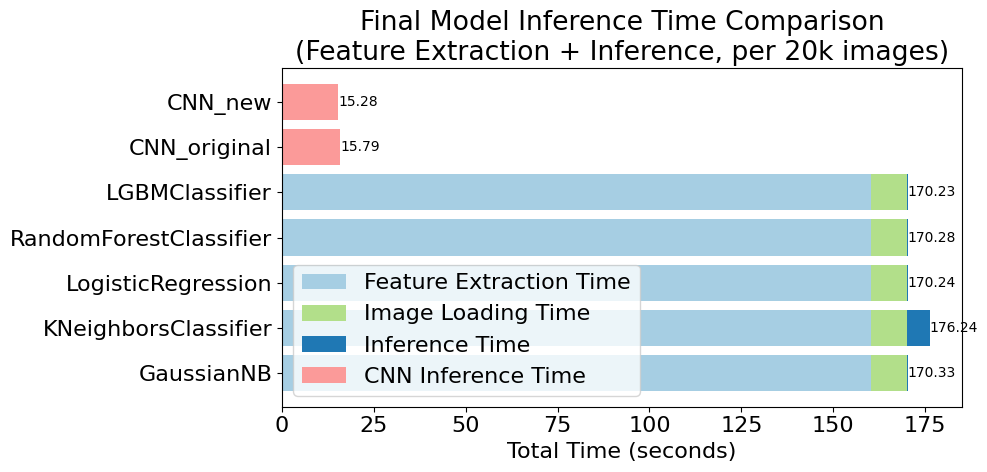

In [252]:
ml_models = ["GaussianNB", "KNeighborsClassifier", "LogisticRegression", "RandomForestClassifier", "LGBMClassifier"]
cnn_models = ["CNN_original", "CNN_new"]

# ML models: prediction_time, feature_extraction_time, image_loading_time
ml_prediction_times = [data_for_plot_best_model_accuracy[m]["prediction_time"] for m in ml_models]
ml_feature_extraction_times = [
    data_for_plot_best_model_accuracy[m].get("feature_extraction_time", 0) / 5 for m in ml_models
]
ml_image_loading_times = [data_for_plot_best_model_accuracy[m].get("image_loading_time", 0) / 5 for m in ml_models]

# CNN models: prediction_time only (no feature extraction/image loading)
cnn_prediction_times = [data_for_plot_best_model_accuracy[m]["prediction_time"] for m in cnn_models]

plt.figure(figsize=(10, 5))
x_ml = np.arange(len(ml_models))
x_cnn = np.arange(len(ml_models), len(ml_models) + len(cnn_models))

# ML models: stacked horizontal bars
p1 = plt.barh(x_ml, ml_feature_extraction_times, color="#a6cee3", label="Feature Extraction Time")
p2 = plt.barh(
    x_ml,
    ml_image_loading_times,
    left=ml_feature_extraction_times,
    color="#b2df8a",
    label="Image Loading Time",
)
p3 = plt.barh(
    x_ml,
    ml_prediction_times,
    left=np.array(ml_feature_extraction_times) + np.array(ml_image_loading_times),
    color="#1f78b4",
    label="Inference Time",
)

# CNN models: single color horizontal bar
bars_cnn = plt.barh(x_cnn, cnn_prediction_times, color="#fb9a99", label="CNN Inference Time")

plt.xlabel("Total Time (seconds)")
plt.title("Final Model Inference Time Comparison\n(Feature Extraction + Inference, per 20k images)")
plt.yticks(list(x_ml) + list(x_cnn), ml_models + cnn_models, rotation=0)
plt.tight_layout()

# Add numbers at the end of each bar
for idx, _ in enumerate(ml_feature_extraction_times + cnn_prediction_times):
    total_time = (
        ml_feature_extraction_times[idx] + ml_image_loading_times[idx] + ml_prediction_times[idx]
        if idx < len(ml_models)
        else cnn_prediction_times[idx - len(ml_models)]
    )
    plt.text(
        total_time,
        idx,
        f"{total_time:.2f}",
        va="center",
        ha="left",
        fontsize=10,
    )
plt.legend(loc="lower left")
plt.show()
